In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preprocessing

In [ ]:
df=pd.read_csv('/content/olympics2024.csv - olympics2024.csv.csv')

In [ ]:
df

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
...,...,...,...,...,...,...,...
86,84,Peru,PER,0,0,1,1
87,84,Qatar,QAT,0,0,1,1
88,84,Singapore,SIN,0,0,1,1
89,84,Slovakia,SVK,0,0,1,1


# 2. Analysis Engine

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


In [ ]:
df.isnull().sum()

,0
Rank,0
Country,0
Country Code,0
Gold,0
Silver,0
Bronze,0
Total,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


In [ ]:
data=df
mean_values = data[['Gold', 'Silver', 'Bronze', 'Total']].mean()
median_values = data[['Gold', 'Silver', 'Bronze', 'Total']].median()
std_dev_values = data[['Gold', 'Silver', 'Bronze', 'Total']].std()
summary = data[['Gold', 'Silver', 'Bronze', 'Total']].describe()
print("Mean Values:")
print(mean_values)
print("\nMedian Values:")
print(median_values)
print("\nStandard Deviation Values:")
print(std_dev_values)
print("\nSummary Statistics:")
print(summary)

Mean Values:
Gold       3.604396
Silver     3.593407
Bronze     4.219780
Total     11.417582
dtype: float64

Median Values:
Gold      1.0
Silver    1.0
Bronze    2.0
Total     5.0
dtype: float64

Standard Deviation Values:
Gold       6.990278
Silver     6.770816
Bronze     6.558798
Total     19.702829
dtype: float64

Summary Statistics:
            Gold     Silver     Bronze       Total
count  91.000000  91.000000  91.000000   91.000000
mean    3.604396   3.593407   4.219780   11.417582
std     6.990278   6.770816   6.558798   19.702829
min     0.000000   0.000000   0.000000    1.000000
25%     0.000000   0.000000   1.000000    2.000000
50%     1.000000   1.000000   2.000000    5.000000
75%     3.000000   3.000000   5.000000    9.000000
max    40.000000  44.000000  42.000000  126.000000


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Select relevant columns for clustering
features = df[['Gold', 'Silver', 'Bronze', 'Total']]

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Let's assume we want 3 clusters
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_

print(df[['Country', 'Cluster']])


          Country  Cluster
0   United States        2
1           China        2
2           Japan        1
3       Australia        1
4          France        1
..            ...      ...
86           Peru        0
87          Qatar        0
88      Singapore        0
89       Slovakia        0
90         Zambia        0

[91 rows x 2 columns]


#  3. Report Generation

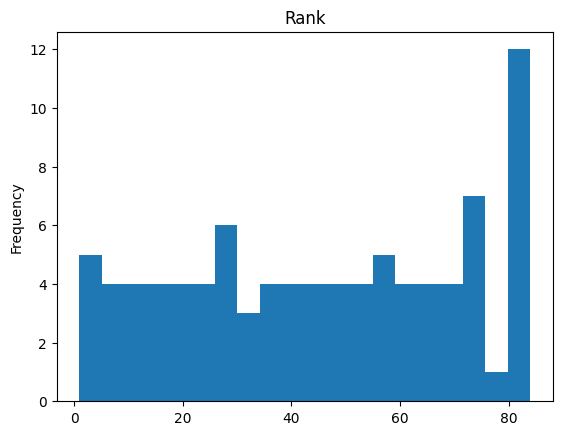

In [ ]:
from matplotlib import pyplot as plt
df['Rank'].plot(kind='hist', bins=20, title='Rank', )
plt.show()

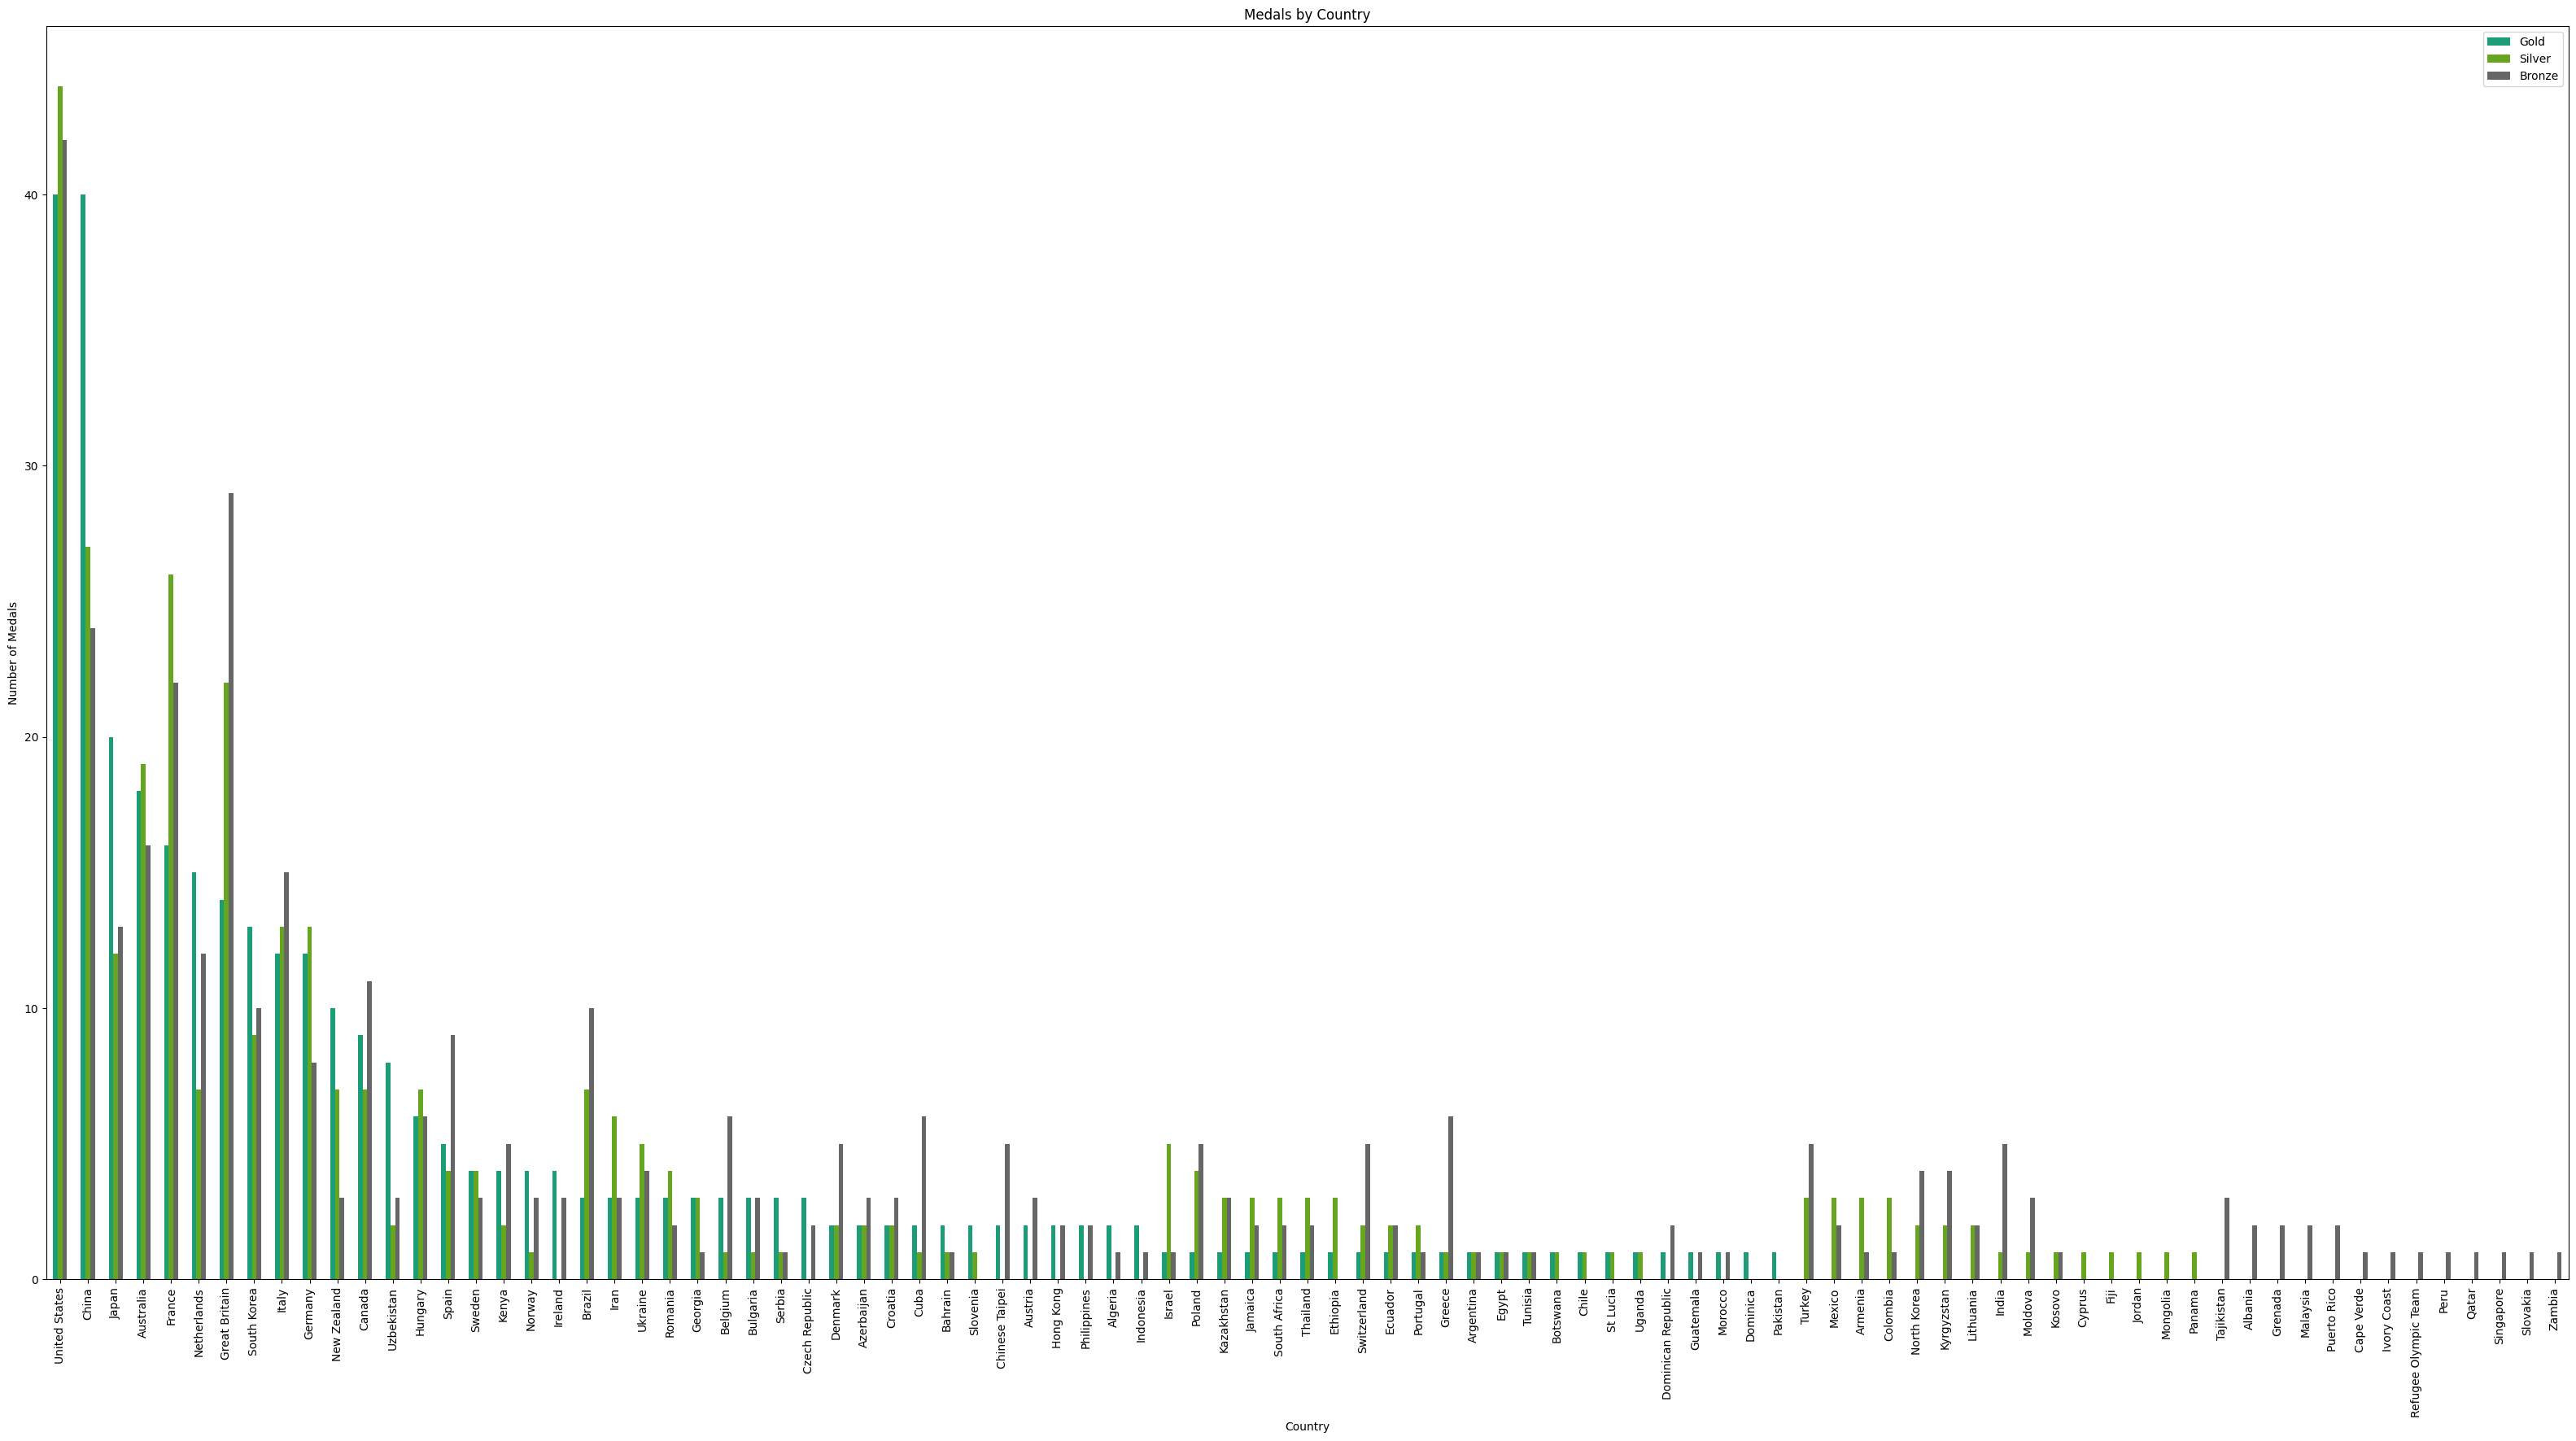

In [ ]:
# Bar chart for Gold, Silver, and Bronze medals by Country
# plt.figure(figsize=(100, 40))
df.plot(kind='bar', x='Country', y=['Gold', 'Silver', 'Bronze'], figsize=(40,20), fontsize=10,colormap='Dark2')
plt.title('Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.show()



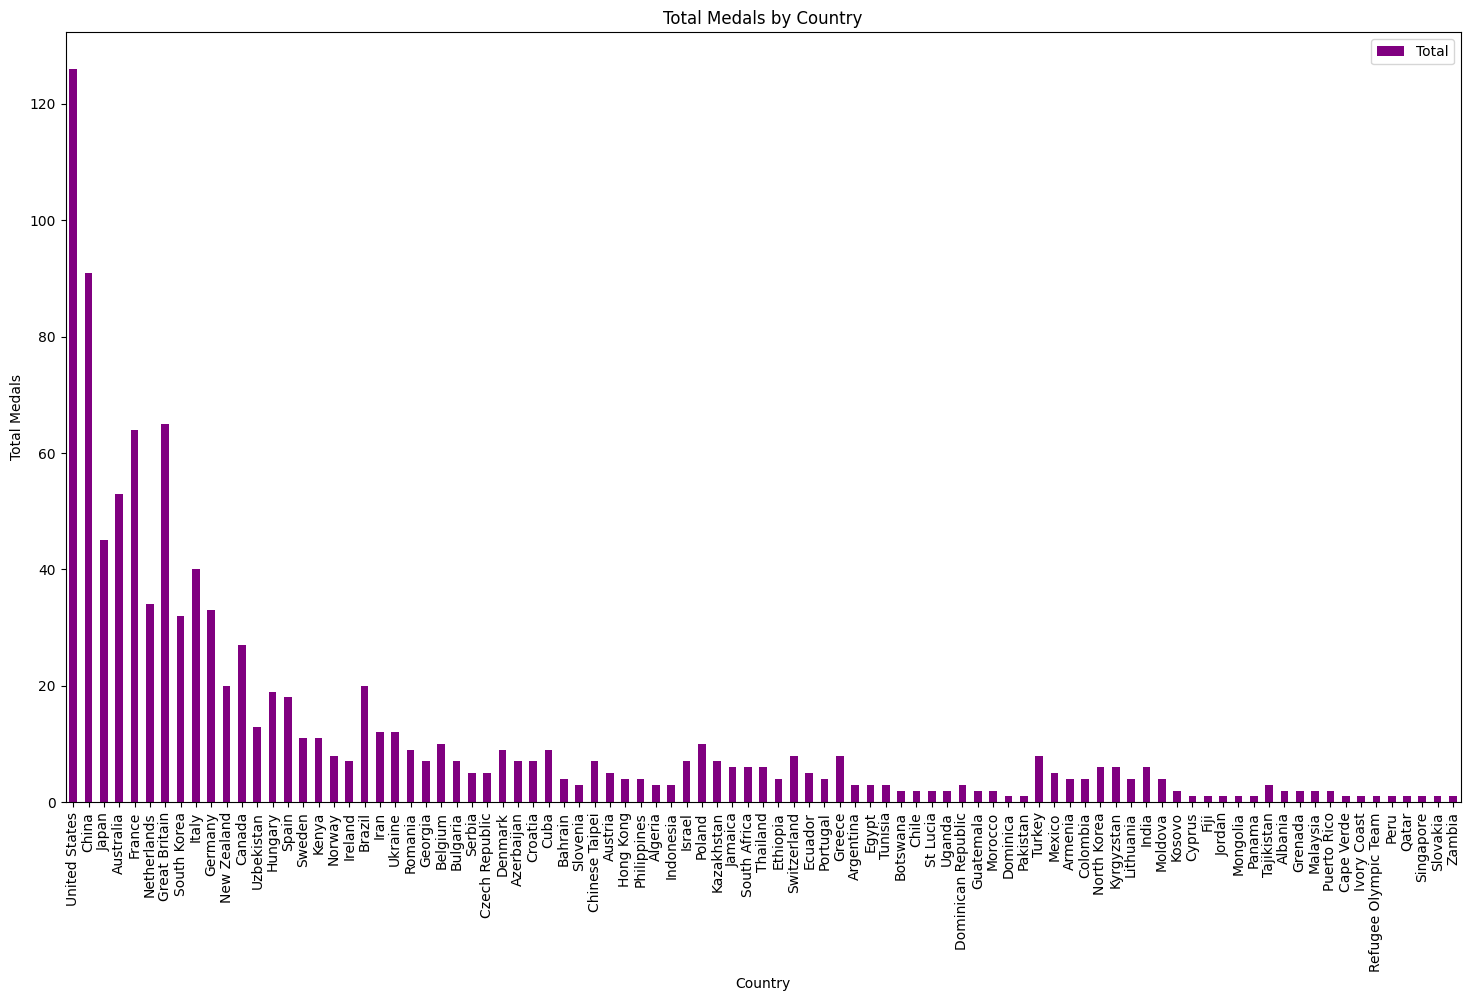

In [ ]:
# Bar chart for Total medals by Country
df.plot(kind='bar', x='Country', y='Total', figsize=(18, 10), color='Purple')
plt.title('Total Medals by Country')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.show()


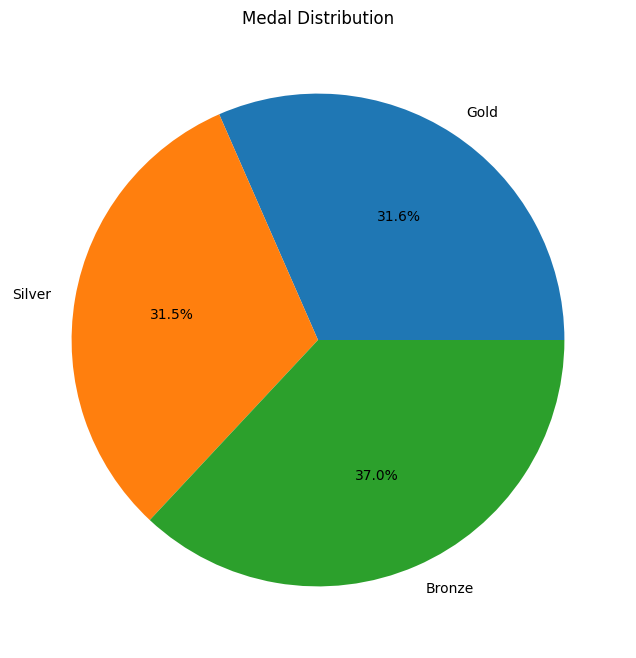

In [ ]:
# Pie chart for Gold, Silver, and Bronze medal distribution
plt.figure(figsize=(8, 8))
# Create a list of medal counts
medals = [df['Gold'].sum(), df['Silver'].sum(), df['Bronze'].sum()]
# Create labels for each medal type
labels = ['Gold', 'Silver', 'Bronze']
plt.pie(medals, labels=labels, autopct='%1.1f%%')
plt.title('Medal Distribution')
plt.show()

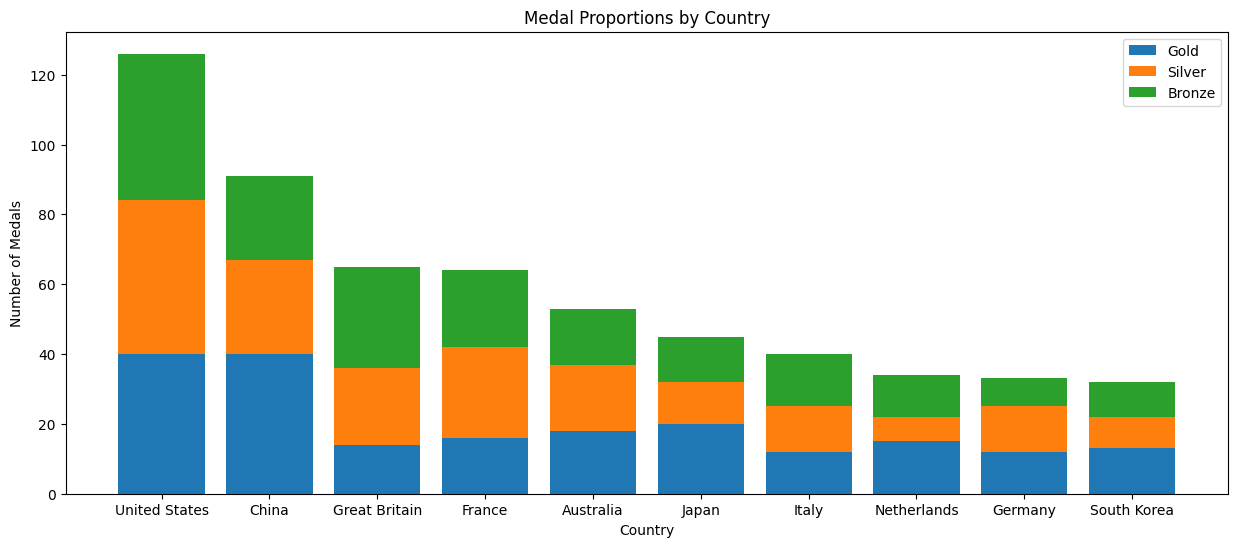

In [ ]:
#Medal Proportions by Country

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
df_top10 = df.sort_values('Total', ascending=False).head(10)

plt.bar(df_top10['Country'], df_top10['Gold'], label='Gold')
plt.bar(df_top10['Country'], df_top10['Silver'], bottom=df_top10['Gold'], label='Silver')
plt.bar(df_top10['Country'], df_top10['Bronze'], bottom=df_top10['Gold'] + df_top10['Silver'], label='Bronze')

plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Medal Proportions by Country')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

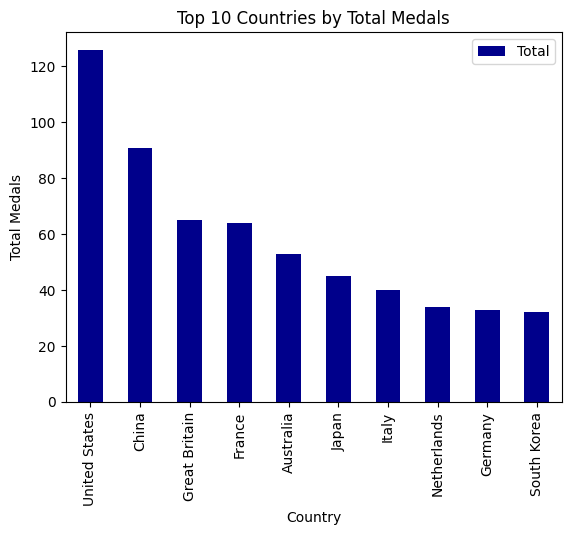

In [ ]:

# Bar chart for Top 10 Countries by Total medals
plt.figure(figsize=(10, 6))
df.sort_values(by='Total', ascending=False).head(10).plot(kind='bar', x='Country', y='Total', color='DarkBlue')
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.show()



K-Means clustering groups countries based on similar performance metrics, you can use the Gold, Silver, Bronze, and Total columns:

In [ ]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['Gold', 'Silver', 'Bronze']]  # Features
y = data['Total']  # Target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 4.6699527614208605e-28
R-squared: 1.0


#  4. User Interaction

It is difficult to implement a Command-Line Interface (CLI) directly in Google Colab since these environments do not allow typical command-line parameter parsing in the same way that scripts do. Hence used the following way:

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
def load_data(file_path):
    return pd.read_csv(file_path)

# Descriptive Statistics
def descriptive_statistics(data):
    mean_values = data[['Gold', 'Silver', 'Bronze', 'Total']].mean()
    median_values = data[['Gold', 'Silver', 'Bronze', 'Total']].median()
    std_dev_values = data[['Gold', 'Silver', 'Bronze', 'Total']].std()
    summary = data[['Gold', 'Silver', 'Bronze', 'Total']].describe()
    print("Mean:\n", mean_values)
    print("\nMedian:\n", median_values)
    print("\nStandard Deviation:\n", std_dev_values)
    print("\nSummary:\n", summary)

# K-Means Clustering
def kmeans_clustering(data, n_clusters):
    features = data[['Gold', 'Silver', 'Bronze', 'Total']]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    data['Cluster'] = kmeans.labels_
    print(data[['Country', 'Cluster']])

# Linear Regression
def linear_regression(data):
    X = data[['Gold', 'Silver', 'Bronze']]
    y = data['Total']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

# Simulating CLI in a notebook environment
def main(file_path, analysis_type, n_clusters=None):
    # Load data
    data = load_data(file_path)

    # Run analysis based on user input
    if analysis_type == 'descriptive':
        descriptive_statistics(data)
    elif analysis_type == 'kmeans':
            kmeans_clustering(data, n_clusters)
    elif analysis_type == 'linear_regression':
        linear_regression(data)

# Example usage in Google Colab
file_path = '/content/olympics2024.csv - olympics2024.csv.csv'  # Replace with your actual file path
analysis_type = 'kmeans'  # Choose 'descriptive', 'kmeans', or 'linear_regression'
n_clusters = 3

# Call the main function
main(file_path, analysis_type, n_clusters)


          Country  Cluster
0   United States        2
1           China        2
2           Japan        1
3       Australia        1
4          France        1
..            ...      ...
86           Peru        0
87          Qatar        0
88      Singapore        0
89       Slovakia        0
90         Zambia        0

[91 rows x 2 columns]


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def process_query(query):
    tokens = word_tokenize(query.lower())

    if "trends" in tokens or "patterns" in tokens:
        return "Running analysis to identify key trends..."
    elif "summary" in tokens:
        return "Generating summary of the data..."
    else:
        return "Sorry, I didn't understand that. Please try again."

def main():
    while True:
        query = input("Enter your query (or type 'exit' to quit): ")
        if query.lower() == 'exit':
            break
        response = process_query(query)
        print(response)

if __name__ == '__main__':
    main()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter your query (or type 'exit' to quit): give me the summary of the data
Generating summary of the data...
Enter your query (or type 'exit' to quit): exit
